In [ ]:
#Importing

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
import re
import datetime
import os
import glob
import seaborn as sns
from scipy import stats
import warnings
import codecs
#warnings.warnings('ignore')
%matplotlib inline
print('Hello, All is imported successfully')

Hello, All is imported successfully


In [ ]:
#Gathering the data

In [7]:
#Twitter Archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
#Image Prediction
if not(os.path.isfile('image-predictions.tsv')):
    url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
    response = requests.get(url)

    with open('image-predictions.tsv', mode ='wb') as file:
        file.write(response.content)
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [9]:
#Twitter API
#I could not create a Twitter developer account,So I used the supported file from Udacity
#First, I faced a problem because the file was not in JSON format, but i used the Spyder python tool to iterate around the file to make it suitable
#I could not use Jupyter notebook to do the above step, because i tried many times to do it, but every time the browser was crashed
#Kindly tell me if the tweet_json file is not completed after iteration, and tell me how to get it complete 
my_list = []
with open('tweet_json.txt', encoding='utf-8',errors='ignore') as json_file:  
    data = json.load(json_file)
    for each_dictionary in data:
        tweet_id = each_dictionary['id']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']

        my_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count)
                            })
        tweet_json_df = pd.DataFrame(my_list, columns = ['tweet_id', 'favorite_count','retweet_count'])        

In [10]:
tweet_json_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,38841,8601
1,892177421306343426,33266,6320
2,891815181378084864,25063,4194
3,891689557279858688,42214,8714
4,891327558926688256,40361,9486


In [ ]:
#Assessing the data
#for quality and tidiness
#Visually and programatically

In [ ]:
#1 Vissual Assessment

In [ ]:
#1.1 for twitter_archive
twitter_archive

In [ ]:
#1.2 for image_prediction
image_prediction

In [ ]:
#1.3 for tweet_json_df
tweet_json_df

In [ ]:
#2 Programatic Assessment

In [ ]:
#2.1 for twitter_archive

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
print("Test between {} to {}.".format(twitter_archive['timestamp'].min(), twitter_archive['timestamp'].max()))

Test between 2015-11-15 22:32:08 +0000 to 2017-08-01 16:23:56 +0000.


In [14]:
print(" Are there missing data in twitter_archive ?  {}.".format(twitter_archive.isnull().values.any()))

 Are there missing data in twitter_archive ?  True.


In [15]:
pd.isnull(twitter_archive).sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
print("Unique tweet_id in is = {}.".format(int(twitter_archive['tweet_id'].nunique())))

Unique tweet_id in is = 2356.


In [17]:
twitter_archive.groupby('name')['name'].nunique()

name
Abby            1
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          1
Albus           1
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           1
Alfy            1
Alice           1
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Ziva            1
Zoe             1
Zoey            1
Zooey           1
Zuzu            1
a               1
actually        1
all             1
an              1
by              1
getting         1
his             1
incredibly      1
infuriating     1
just            1
life            1
light           1
mad             1
my              1
not             1
officially      1
old             1
one             1
quite           1
space

In [18]:
twitter_archive[twitter_archive['expanded_urls'].duplicated()].count()

tweet_id                      137
in_reply_to_status_id          54
in_reply_to_user_id            54
timestamp                     137
source                        137
text                          137
retweeted_status_id             1
retweeted_status_user_id        1
retweeted_status_timestamp      1
expanded_urls                  79
rating_numerator              137
rating_denominator            137
name                          137
doggo                         137
floofer                       137
pupper                        137
puppo                         137
dtype: int64

In [19]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/667138269671505920/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [20]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [31]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 24, 'text'])

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object


In [30]:
print(twitter_archive.loc[twitter_archive.rating_numerator == 121, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 144, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 960, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_numerator == 1776, 'text'])

1635    Someone help the girl is being mugged. Several...
Name: text, dtype: object
1779    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
Name: text, dtype: object
313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object
979    This is Atticus. He's quite simply America af....
Name: text, dtype: object


In [35]:
print(twitter_archive['text'][2300])

This is Keet. He is a Floridian Amukamara. Absolutely epic propeller hat. Pristine tongue. Nice plaid. 10/10 https://t.co/tz1lpuvXLA


In [36]:
twitter_archive['rating_denominator'].unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [37]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [38]:
print(twitter_archive.loc[twitter_archive.rating_denominator == 7, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 80, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 2, 'text']) 
print(twitter_archive.loc[twitter_archive.rating_denominator == 130, 'text']) 

516    Meet Sam. She smiles 24/7 &amp; secretly aspir...
Name: text, dtype: object
1254    Here's a brigade of puppers. All look very pre...
1843    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object
2335    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object
1634    Two sneaky puppers were not initially seen, mo...
Name: text, dtype: object


In [40]:
print(twitter_archive['text'][603])
print(twitter_archive['text'][471])
print(twitter_archive['text'][239])
print(twitter_archive['text'][798])

RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
This is Binky. She appears to be rather h*ckin cozy. Nifty leg cross as well. 12/10 would snug well https://t.co/WFt82XLyEF
This is Tuck. As you can see, he's rather h*ckin rare. Taken seriously until his legs are seen. Tail stuck in a permanent zoom. 13/10 https://t.co/P7PBGqrKSe
You need to watch these two doggos argue through a cat door. Both 11/10 https://t.co/qEP31epKEV


In [47]:
with pd.option_context('max_colwidth', 400):
    display(twitter_archive[twitter_archive['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\Abdalrhman Ashour\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [ ]:
#2.2 for image_prediction

In [48]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
print(" Are there missing values in image_predictions ?  {}.".format(image_prediction.isnull().values.any()))

 Are there missing values in image_predictions ?  False.


In [50]:
sum(image_prediction['tweet_id'].duplicated())

0

In [51]:
sum(image_prediction.jpg_url.duplicated())

66

In [52]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [54]:
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
German_shepherd               20
Staffordshire_bullterrier     20
Siberian_husky                20
Cardigan                      19
web_site                      19
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [56]:
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
miniature_pinscher                 20
chow                               20
malinois                           20
Samoyed                            20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

In [57]:
image_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
toy_poodle                        29
Pekinese                          29
Pomeranian                        29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [58]:
image_prediction[(image_prediction['p1_dog']==False) & (image_prediction['p2_dog']==False) & (image_prediction['p3_dog']==False)].count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [59]:
image_prediction[(image_prediction['p1_dog']==False) & (image_prediction['p2_dog']==False) & (image_prediction['p3_dog']==False)].sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
311,671544874165002241,https://pbs.twimg.com/media/CVHOgDvU4AAfrXD.jpg,1,feather_boa,0.240858,False,wig,0.085946,False,wool,0.040674,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
655,682242692827447297,https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg,1,snorkel,0.504983,False,loggerhead,0.345298,False,scuba_diver,0.074754,False
1851,840370681858686976,https://pbs.twimg.com/media/C6mYrK0UwAANhep.jpg,1,teapot,0.981819,False,cup,0.014026,False,coffeepot,0.002421,False
56,667065535570550784,https://pbs.twimg.com/media/CUHkkJpXIAA2w3n.jpg,1,jigsaw_puzzle,0.560001,False,doormat,0.103259,False,space_heater,0.042568,False
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
1622,803380650405482500,https://pbs.twimg.com/media/CyYub2kWEAEYdaq.jpg,1,bookcase,0.890601,False,entertainment_center,0.019287,False,file,0.009490,False
528,676776431406465024,https://pbs.twimg.com/ext_tw_video_thumb/67677...,1,doormat,0.201346,False,dishwasher,0.191749,False,microwave,0.038110,False
1040,712092745624633345,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,1,triceratops,0.235373,False,llama,0.153126,False,three-toed_sloth,0.111840,False
1448,776113305656188928,https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg,1,mousetrap,0.777468,False,black_widow,0.093940,False,paddlewheel,0.017492,False


In [ ]:
#2.3 for tweet_json_df

In [60]:
tweet_json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id          2345 non-null object
favorite_count    2345 non-null int64
retweet_count     2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [61]:
tweet_json_df.describe()

,favorite_count,retweet_count
count,2345.000000,2345.000000
mean,8074.655437,3028.823028
std,12149.249777,5037.987427
min,0.000000,0.000000
25%,1406.000000,607.000000
50%,3540.000000,1414.000000
75%,9977.000000,3529.000000
max,143519.000000,77435.000000


In [62]:
print(sum(tweet_json_df.groupby('tweet_id')['tweet_id'].nunique())) 

2345


In [63]:
print(sum(tweet_json_df.tweet_id.duplicated()))

0


In [ ]:
#Cleaning the data

In [65]:
#1 Dataframes Copies
twitter_archive_for_clean = twitter_archive.copy() 
image_prediction_for_clean = image_prediction.copy() 
tweet_json_df_for_clean = tweet_json_df.copy()

In [66]:
#2 Get the lengths
print(len(twitter_archive_for_clean))
print(len(image_prediction_for_clean))
print(len(tweet_json_df_for_clean))

2356
2075
2345


In [67]:
#3 Remove tweets that retweeted
twitter_archive_for_clean = twitter_archive_for_clean[pd.isnull(twitter_archive_for_clean.retweeted_status_id)]

In [68]:
twitter_archive_for_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [69]:
#4 Remove tweets that has no images and duplicated images
twitter_archive_for_clean = twitter_archive_for_clean.dropna(subset=['expanded_urls'])
twitter_archive_for_clean = twitter_archive_for_clean.drop_duplicates(subset=['expanded_urls'], keep='last')

In [70]:
twitter_archive_for_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2116 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2116 non-null object
source                        2116 non-null object
text                          2116 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2116 non-null int64
rating_denominator            2116 non-null int64
name                          2116 non-null object
doggo                         2116 non-null object
floofer                       2116 non-null object
pupper                        2116 non-null object
puppo                         2116 non-null object
dtypes: float64(4), int64(3), object(1

In [71]:
#5 Remove duplicated jpg_url
image_prediction_for_clean = image_prediction_for_clean.drop_duplicates(subset=['jpg_url'], keep='last')

In [72]:
sum(image_prediction_for_clean['jpg_url'].duplicated())

0

In [80]:
#6 Merge the three dataframes
twitter_archive_for_clean = pd.merge(left=twitter_archive_for_clean,right=tweet_json_df_for_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
#tweet_json_df_for_clean['tweet_id']=tweet_json_df_for_clean['tweet_id'].astype("int64")

In [81]:
twitter_archive_for_clean = twitter_archive_for_clean.merge(image_prediction_for_clean, on='tweet_id', how='inner')

In [82]:
twitter_archive_for_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 1927
Data columns (total 30 columns):
tweet_id                      1928 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1928 non-null object
source                        1928 non-null object
text                          1928 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1928 non-null object
rating_numerator              1928 non-null int64
rating_denominator            1928 non-null int64
name                          1928 non-null object
doggo                         1928 non-null object
floofer                       1928 non-null object
pupper                        1928 non-null object
puppo                         1928 non-null object
favorite_count                1928 non

In [83]:
#7 Indicate Dog stages
twitter_archive_for_clean.loc[twitter_archive_for_clean.doggo == 'None', 'doggo'] = ''
twitter_archive_for_clean.loc[twitter_archive_for_clean.floofer == 'None', 'floofer'] = ''
twitter_archive_for_clean.loc[twitter_archive_for_clean.pupper == 'None', 'pupper'] = ''
twitter_archive_for_clean.loc[twitter_archive_for_clean.puppo == 'None', 'puppo'] = ''

twitter_archive_for_clean.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,,,,,1633
1,,,,puppo,21
2,,,pupper,,199
3,,floofer,,,7
4,doggo,,,,59
5,doggo,,,puppo,1
6,doggo,,pupper,,7
7,doggo,floofer,,,1


In [84]:
twitter_archive_for_clean['dog_stage'] = twitter_archive_for_clean.doggo + twitter_archive_for_clean.floofer + twitter_archive_for_clean.pupper + twitter_archive_for_clean.puppo
twitter_archive_for_clean.loc[twitter_archive_for_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
twitter_archive_for_clean.loc[twitter_archive_for_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
twitter_archive_for_clean.loc[twitter_archive_for_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'

twitter_archive_for_clean.loc[twitter_archive_for_clean.dog_stage == '', 'dog_stage'] = 'None'

In [85]:
twitter_archive_for_clean.dog_stage.value_counts()

None             1633
pupper            199
doggo              59
puppo              21
doggo,pupper        7
floofer             7
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [86]:
#8 Remove colimns will not be used
twitter_archive_for_clean = twitter_archive_for_clean.drop(['retweeted_status_user_id',
                              'retweeted_status_timestamp', 'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

In [87]:
twitter_archive_for_clean = twitter_archive_for_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

In [88]:
twitter_archive_for_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 292
Data columns (total 27 columns):
tweet_id               1928 non-null int64
timestamp              1928 non-null object
source                 1928 non-null object
text                   1928 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1928 non-null object
rating_numerator       1928 non-null int64
rating_denominator     1928 non-null int64
name                   1928 non-null object
doggo                  1928 non-null object
floofer                1928 non-null object
pupper                 1928 non-null object
puppo                  1928 non-null object
favorite_count         1928 non-null int64
retweet_count          1928 non-null int64
jpg_url                1928 non-null object
img_num                1928 non-null int64
p1                     1928 non-null object
p1_conf                1928 non-null float64
p1_dog                 1928 non-null bool
p2                     

In [89]:
#9 Convert incorrected datatypes
twitter_archive_for_clean['timestamp'] = pd.to_datetime(twitter_archive_for_clean['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [90]:
twitter_archive_for_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928 entries, 0 to 292
Data columns (total 27 columns):
tweet_id               1928 non-null int64
timestamp              1928 non-null datetime64[ns, UTC]
source                 1928 non-null object
text                   1928 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1928 non-null object
rating_numerator       1928 non-null int64
rating_denominator     1928 non-null int64
name                   1928 non-null object
doggo                  1928 non-null object
floofer                1928 non-null object
pupper                 1928 non-null object
puppo                  1928 non-null object
favorite_count         1928 non-null int64
retweet_count          1928 non-null int64
jpg_url                1928 non-null object
img_num                1928 non-null int64
p1                     1928 non-null object
p1_conf                1928 non-null float64
p1_dog                 1928 non-null bool
p2        

In [91]:
#10 Change Inconsistent dog names
twitter_archive_for_clean['p1'] = twitter_archive_for_clean['p1'].str.lower()
twitter_archive_for_clean['p2'] = twitter_archive_for_clean['p2'].str.lower()
twitter_archive_for_clean['p3'] = twitter_archive_for_clean['p3'].str.lower()

In [92]:
twitter_archive_for_clean.sample(15)

,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,doggo,...,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage
1384,677573743309385728,2015-12-17 19:39:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,NaN,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,,...,patio,0.535070,False,folding_chair,0.080419,False,parallel_bars,0.034796,False,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,...,paper_towel,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,None
1388,677530072887205888,2015-12-17 16:45:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Axel. He's a Black Chevy Pinot on...,NaN,https://twitter.com/dog_rates/status/677530072...,9,10,Axel,,...,staffordshire_bullterrier,0.689259,True,norwegian_elkhound,0.026121,True,american_staffordshire_terrier,0.023075,True,None
1561,672984142909456390,2015-12-05 03:41:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Very happy pup here. Always smiling. Loves his...,NaN,https://twitter.com/dog_rates/status/672984142...,9,10,None,,...,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False,None
307,822462944365645825,2017-01-20 15:17:01+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Gabe. He was the unequivocal embodimen...,NaN,https://twitter.com/dog_rates/status/822462944...,14,10,Gabe,,...,pomeranian,0.960199,True,samoyed,0.023056,True,maltese_dog,0.008945,True,pupper
76,874057562936811520,2017-06-12 00:15:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I can't believe this keeps happening. This, is...",NaN,https://twitter.com/dog_rates/status/874057562...,12,10,None,,...,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,newfoundland,0.028228,True,None
950,708149363256774660,2016-03-11 04:35:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jebberson. He's the reigning hide and ...,NaN,https://twitter.com/dog_rates/status/708149363...,10,10,Jebberson,,...,cardigan,0.350993,True,basset,0.164555,True,toy_terrier,0.080484,True,None
226,836380477523124226,2017-02-28 01:00:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Ava. She just blasted off. Streamline ...,NaN,https://twitter.com/dog_rates/status/836380477...,12,10,Ava,,...,wooden_spoon,0.082489,False,sliding_door,0.061017,False,grand_piano,0.055086,False,pupper
90,870804317367881728,2017-06-03 00:48:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Real funny guys. Sending in a pic without a do...,NaN,https://twitter.com/dog_rates/status/870804317...,11,10,None,,...,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False,None
324,819227688460238848,2017-01-11 17:01:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's wondering if you come here ...,NaN,https://twitter.com/dog_rates/status/819227688...,12,10,Finn,,...,border_terrier,0.482452,True,german_shepherd,0.181082,True,norwegian_elkhound,0.065257,True,None


In [93]:
#11 change Incorrect numerator and denominator
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 740373189193256964), 'rating_numerator'] = 14
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 740373189193256964), 'rating_denominator'] = 10
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 682962037429899265), 'rating_numerator'] = 10
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 682962037429899265), 'rating_denominator'] = 10
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 666287406224695296), 'rating_numerator'] = 9
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 666287406224695296), 'rating_denominator'] = 10
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 722974582966214656), 'rating_numerator'] = 13
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 722974582966214656), 'rating_denominator'] = 10
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 716439118184652801), 'rating_numerator'] = 13.5
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 716439118184652801), 'rating_denominator'] = 10
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.5
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.25
twitter_archive_for_clean.loc[(twitter_archive_for_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.25
#remove tweets with no actual ratings
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['tweet_id'] != 832088576586297345]
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['tweet_id'] != 810984652412424192]
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['tweet_id'] != 682808988178739200]
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['tweet_id'] != 835246439529840640]
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['tweet_id'] != 686035780142297088]
# remove outlier
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['rating_numerator'] != 420]
twitter_archive_for_clean = twitter_archive_for_clean[twitter_archive_for_clean['rating_numerator'] != 1776]

In [94]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_for_clean[twitter_archive_for_clean['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
1248,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121.0,110
1247,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143.0,130
1436,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88.0,80
1377,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144.0,120
1003,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60.0,50
920,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80.0,80
898,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99.0,90
938,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45.0,50
1077,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44.0,40
316,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84.0,70


In [95]:
twitter_archive_for_clean['rating_numerator'] = twitter_archive_for_clean['rating_numerator'].astype(int)
twitter_archive_for_clean['rating_denominator'] = twitter_archive_for_clean['rating_denominator'].astype(float)

In [96]:
twitter_archive_for_clean['rating'] = 10 * twitter_archive_for_clean['rating_numerator'] / twitter_archive_for_clean['rating_denominator']

In [97]:
with pd.option_context('max_colwidth', 200):
    display(twitter_archive_for_clean[twitter_archive_for_clean['rating_denominator'] != 10][['tweet_id','text','rating_numerator','rating_denominator','rating']])

,tweet_id,text,rating_numerator,rating_denominator,rating
1248,684222868335505415,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110.0,11.0
1247,684225744407494656,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130.0,11.0
1436,675853064436391936,Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,88,80.0,11.0
1377,677716515794329600,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120.0,12.0
1003,704054845121142784,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50.0,12.0
920,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80.0,10.0
898,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90.0,11.0
938,709198395643068416,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50.0,9.0
1077,697463031882764288,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40.0,11.0
316,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70.0,12.0


In [98]:
twitter_archive_for_clean['rating'].value_counts()

12.0    435
10.0    413
11.0    388
13.0    243
9.0     153
8.0      95
7.0      51
14.0     33
5.0      33
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
0.0       2
Name: rating, dtype: int64

In [99]:
#Storing the data
twitter_archive_for_clean.to_csv('twitter_archive_master.csv')

In [100]:
#Analyzing and Visualyzing the data
master_data = pd.read_csv('twitter_archive_master.csv')
master_data.head(15)

,Unnamed: 0,tweet_id,timestamp,source,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_stage,rating
0,0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10.0,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,None,13.0
1,1273,682962037429899265,2016-01-01 16:30:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,https://twitter.com/dog_rates/status/682962037...,10,10.0,Darrel,...,0.278600,False,chihuahua,0.155207,True,loupe,0.153598,False,None,10.0
2,1272,683030066213818368,2016-01-01 21:00:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lulu. She's contemplating all her unre...,NaN,https://twitter.com/dog_rates/status/683030066...,10,10.0,Lulu,...,0.722218,True,bull_mastiff,0.193804,True,french_bulldog,0.055194,True,None,10.0
3,1270,683098815881154561,2016-01-02 01:33:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,https://twitter.com/dog_rates/status/683098815...,12,10.0,None,...,0.889848,True,kuvasz,0.053008,True,labrador_retriever,0.037881,True,None,12.0
4,1267,683357973142474752,2016-01-02 18:43:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,https://twitter.com/dog_rates/status/683357973...,10,10.0,None,...,0.406509,True,cardigan,0.154854,True,siberian_husky,0.136366,True,None,10.0
5,1266,683391852557561860,2016-01-02 20:58:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Say hello to Jack (pronounced ""Kevin""). He's a...",NaN,https://twitter.com/dog_rates/status/683391852...,11,10.0,Jack,...,0.992833,True,boston_bull,0.004749,True,pug,0.001392,True,None,11.0
6,1265,683449695444799489,2016-01-03 00:47:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I just want to be friends with this dog. Appea...,NaN,https://twitter.com/dog_rates/status/683449695...,10,10.0,None,...,0.303512,True,soft-coated_wheaten_terrier,0.211424,True,golden_retriever,0.170725,True,None,10.0
7,1262,683498322573824003,2016-01-03 04:01:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Griffin. He's desperate for both a phy...,NaN,https://twitter.com/dog_rates/status/683498322...,11,10.0,Griffin,...,0.945362,True,irish_terrier,0.026850,True,lakeland_terrier,0.016826,True,None,11.0
8,1261,683742671509258241,2016-01-03 20:12:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sebastian. He's a womanizer. Romantic af....,NaN,https://twitter.com/dog_rates/status/683742671...,11,10.0,Sebastian,...,0.895279,True,cardigan,0.022385,True,cocker_spaniel,0.017045,True,None,11.0
9,1260,683773439333797890,2016-01-03 22:14:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Buddy. He's gaining strength. Currentl...,NaN,https://twitter.com/dog_rates/status/683773439...,9,10.0,Buddy,...,0.072885,True,labrador_retriever,0.057866,True,schipperke,0.053257,True,None,9.0


In [101]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 29 columns):
Unnamed: 0             1925 non-null int64
tweet_id               1925 non-null int64
timestamp              1925 non-null object
source                 1925 non-null object
text                   1925 non-null object
retweeted_status_id    0 non-null float64
expanded_urls          1925 non-null object
rating_numerator       1925 non-null int64
rating_denominator     1925 non-null float64
name                   1925 non-null object
doggo                  68 non-null object
floofer                8 non-null object
pupper                 206 non-null object
puppo                  22 non-null object
favorite_count         1925 non-null int64
retweet_count          1925 non-null int64
jpg_url                1925 non-null object
img_num                1925 non-null int64
p1                     1925 non-null object
p1_conf                1925 non-null float64
p1_dog                 1925

Text(0, 0.5, 'Breeds')

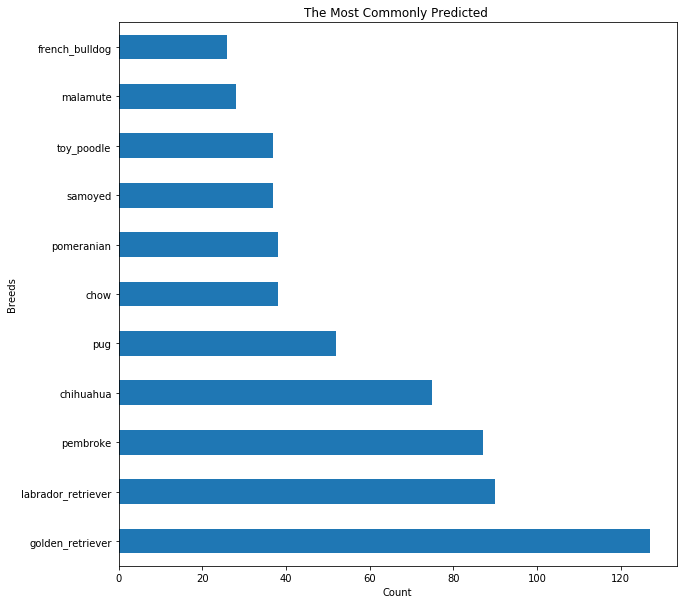

In [102]:
# The commonly predicted dog
dogs_df = master_data.groupby('p1').filter(lambda x: len(x) >= 25)

common_predicted = dogs_df['p1'].value_counts().plot(kind = 'barh', figsize=(10,10))
plt.title('The Most Commonly Predicted ')
plt.xlabel('Count')
plt.ylabel('Breeds')

In [103]:
#  The highest dogs tweets among dog stage.
count_dog_stages_df = master_data['dog_stage'].value_counts()

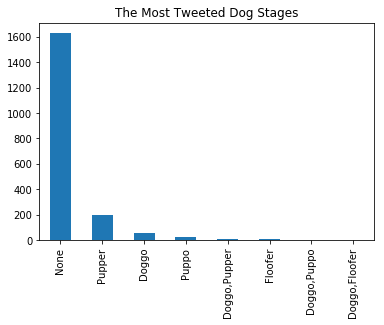

In [105]:
x = np.arange(8)
g = count_dog_stages_df.plot(kind = 'bar', title = 'The Most Tweeted Dog Stages')
plt.xticks(x, ('None', 'Pupper', 'Doggo', 'Puppo', 'Doggo,Pupper', 'Floofer', 'Doggo,Puppo', 'Doggo,Floofer'));

C:\Users\Abdalrhman Ashour\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


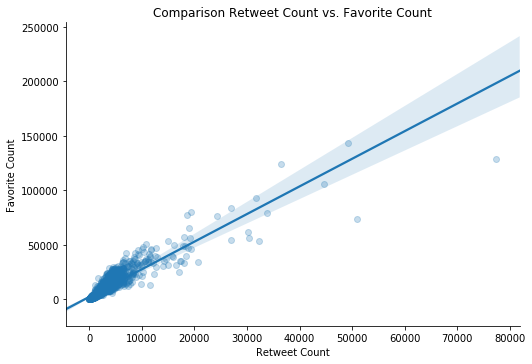

In [109]:
#Identify the Correlation between Retweet Count and Favorite Count
retweet_favorite = sns.lmplot(x = 'retweet_count', y = 'favorite_count', data = master_data, size = 5, aspect = 1.5, scatter_kws={'alpha':1/4})
plt.title('Comparison Retweet Count vs. Favorite Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

# Exporting the figure

retweet_favorite.savefig('correlation_retweet_fav.png')

In [110]:
# Comparison between Rating, frequency, total retweet
master_data['rating'].value_counts()
frequency = master_data['rating'].value_counts().to_dict()
f = pd.DataFrame(list(frequency.items()), columns=['rating', 'frequency'])
f.head(5)

,rating,frequency
0,12.0,435
1,10.0,413
2,11.0,388
3,13.0,243
4,9.0,153


In [112]:
# Calculating the total numbers of Retweet
total_retweet =[]
for i in f['rating']:
    t_r = master_data[master_data['rating'] == i]['retweet_count'].sum()
    total_retweet.append(t_r)
f['total_retweet']=total_retweet
# The mean for Retweets
f['retweet_mean']=f['total_retweet']//f['frequency']
f.head(5)

,rating,frequency,total_retweet,retweet_mean
0,12.0,435,1267652,2914
1,10.0,413,570604,1381
2,11.0,388,749743,1932
3,13.0,243,1505148,6194
4,9.0,153,126048,823


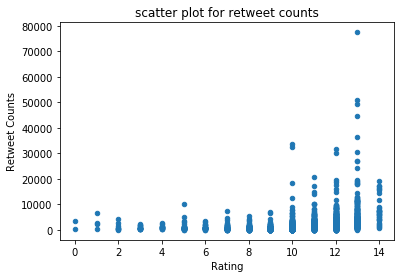

In [113]:
# scatter plot for retweet counts
g = master_data.plot(x='rating', y='retweet_count', kind='scatter')
plt.xlabel('Rating')
plt.ylabel('Retweet Counts')
plt.title('scatter plot for retweet counts')
fig =g.get_figure()
fig.savefig('rating_and_retweets.png')